In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans

In [39]:
raw_data_1 = pd.read_csv("./Preprocessing.csv")

raw_data_1.head(100)

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang,preprocessing
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli data driven kegiatan koordinasi se...
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli it analisa sistem kegiatan koordin...
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior monitoring evaluasi strateg...
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior perencanaan strategic natio...
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6420119,Pengadaan Generator Set 100 Kva / 80 Kw,PDAM Tirta Moedal,Tender Sudah Selesai,335 Jt,Pascakualifikasi Satu File,Tender Cepat,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 375.375.000,00","Rp 335.038.000,00",MITRA NUSANTARA,Jalan Cakra I No.22 RT.1 RW.18 Cokrowijayan Ba...,01.464.445.4-542.000,"Rp 305.789.000,00",pengadaan generator set 100 kva 80 kw
96,6419119,Pengadaan Gate Valve Tahun 2019 <span class='l...,PDAM Tirta Aji Kabupaten Wonosobo,Tender Sudah Selesai,"316,3 Jt",Pascakualifikasi Satu File,Tender Cepat,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 316.564.600,00","Rp 316.322.875,00",PT.TRISUKSES PERMATA,Kirana Two Building lt 10 - A Jalan Boulevard ...,75.555.231.2-043.000,"Rp 315.099.191,00",pengadaan gate valve tahun 2019 span class='la...
97,6418119,Management Pressur Jaringan Distribusi <span c...,PDAM Tirta Aji Kabupaten Wonosobo,Tender Sudah Selesai,468 Jt,Pascakualifikasi Satu File,Tender Cepat,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 468.120.400,00","Rp 467.996.100,00",PT.TRISUKSES PERMATA,Kirana Two Building lt 10 - A Jalan Boulevard ...,75.555.231.2-043.000,"Rp 459.923.836,90",management pressur jaringan distribusi span cl...
98,6417119,Pengadaan Pemancar FM 1 KW + Antena + Coaxcial...,Lembaga Penyiaran Radio Republik Indonesia,Tender Sudah Selesai,"728,9 Jt",Pascakualifikasi Satu File,Tender,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 729.402.000,00","Rp 728.900.000,00",PT. GITA MENATA INDAH,"JL. UTAN KAYU RAYA, NO. 63, RT. 011/005, KEL. ...",71.713.274.0-008.000,"Rp 710.160.000,00",pengadaan pemancar fm 1 kw antena coaxcial ins...


In [40]:
raw_data_1.select_dtypes('object').isna().sum()

nama_tender              0
instansi                 0
status_tender            0
hps                      0
5                        0
6                        0
7                        0
8                        0
10                       0
kategori               663
pagu                   663
hps_detail             663
nama_pemenang          663
alamat_pemenang        663
npwp_pemenang          663
penawaran_pemenang    1163
preprocessing            0
dtype: int64

In [41]:
kmeans_obj = pickle.load(open("kmeans.pickle","rb"))
vectorNormalize = pickle.load(open("vectorNormalize.pickle","rb"))
result_clustering = kmeans_obj.predict(vectorNormalize)

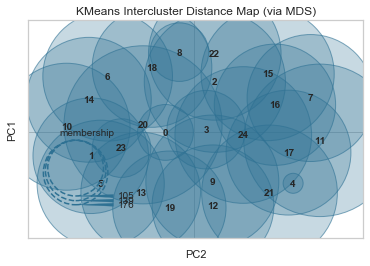

In [42]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

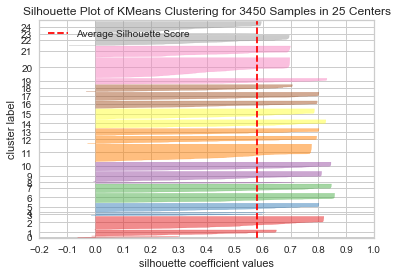

In [43]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [44]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5783311361383423

In [45]:
raw_data_1['kategori'] = result_clustering
raw_data_1

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang,preprocessing
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli data driven kegiatan koordinasi se...
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,22,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli it analisa sistem kegiatan koordin...
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,24,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior monitoring evaluasi strateg...
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,9,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior perencanaan strategic natio...
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,15,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,40119,Pengadaan Working Furniture <span class='label...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"281,8 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,20,"Rp 281.825.500,00","Rp 281.825.500,00",CV.PULAU CANDI UTAMA,"Jl. Kramat Raya No.23 E Lt 1 Senen, Jakarta Pu...",01.626.119.0-023.000,"Rp 226.369.000,00",pengadaan working furniture span class='label ...
3446,39119,Pengadaan Living Furniture <span class='label ...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"290,2 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,23,"Rp 290.237.200,00","Rp 290.237.200,00",PT. Desaku Abadi,"Jl. Kedoya Raya No.53, Kedoya Selatan, Kebon J...",01.724.673.7-039.000,"Rp 251.541.400,00",pengadaan living furniture span class='label l...
3447,36119,PENGADAAN PERALATAN GEROBAK HOME INDUSTRI,Pemerintah Provinsi Bengkulu,Tender Sudah Selesai,"208,3 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,24,NaN,NaN,NaN,NaN,NaN,NaN,pengadaan peralatan gerobak home industri
3448,32119,Pengadaan Modul Aplikasi - SIB,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,600 Jt,Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,5,"Rp 600.000.000,00","Rp 600.000.000,00",PT JIREH DATA INTEGRA,KOMPLEK RUKO MEGA GROSIR CEMPAKA MAS BLOK M no...,31.177.558.9-027.000,"Rp 594.000.000,00",pengadaan modul aplikasi sib


In [46]:
tfidfVectorizer = TfidfVectorizer()
def search_weights(search_keys):  
    search_query_weights = search_keys.lower()
    tfidf_weights_matrix = tfidfVectorizer.fit_transform(raw_data_1['preprocessing'])
    search_query_weights = tfidfVectorizer.transform([search_keys])
    
    return search_query_weights, tfidf_weights_matrix

In [47]:
weights_search, tfidf_weights = search_weights('ahli tenaga')
print(weights_search)

  (0, 3064)	0.6989143686333333
  (0, 147)	0.7152053588430871


In [48]:
def cos_similarity(search_query_weights, tfidf_weights_matrix):

    cosine_distance = cosine_similarity(search_query_weights, tfidf_weights_matrix)
    similarity_list = cosine_distance[0]

    return similarity_list

In [49]:
similarity = cos_similarity(weights_search, tfidf_weights)
df = pd.DataFrame({'res':similarity})
df = df.sort_values(by=['res'],ascending=False)

index= []
for i in df.index: 
    index.append(i)

for i in index:
    print(raw_data_1['nama_tender'].loc[i])
    print('\n')

TENAGA AHLI BIDANG EVALUASI


Tenaga Ahli KPBU 2


Tenaga Ahli Ekonomi Wilayah


Tenaga Ahli Komunikasi Publik


Pengadaan Tenaga Ahli Komunikasi KPPIP


Tenaga Ahli Bidang Pengembangan Wilayah


Pengadaan Jasa Konsultan Tenaga Ahli Ekonomi Pembangunan


Tenaga Ahli Project Manager


Pengadaan Jasa Konsultan Tenaga Ahli Kelembagaan


Tenaga Ahli Monitoring dan Evaluasi Infrastruktur


Tenaga Ahli Manajemen KPBU


Tenaga Ahli Pengelola Sistem Informasi


Pengadaan Jasa Konsultan Tenaga Ahli Monitoring & Evaluasi


Pengadaan Jasa Konsultan Tenaga Ahli Manajemen Keuangan


Tenaga Ahli Hukum KPBU


Pengadaan Jasa Konsultan Tenaga Ahli Data Analis


Pengadaan Tenaga Ahli Teknik Sipil


Pengadaan Jasa Konsultan Tenaga Ahli Muda Hukum


Pengadaan Jasa Konsultan Tenaga Ahli Manajemen Proyek


Tenaga Ahli Teknik Arsitektur


Tenaga Ahli Knowledge Management


Pengadaan Tenaga Ahli Teknik Arsitektur


Pengadaan Jasa Konsultan Tenaga Ahli Communication Manager


Tenaga Ahli Audio Visual 1


Tenag


PENYEDIAAN TENAGA ALIH DAYA UNTUK PELAYANAN LOKET <span class='label label-warning'>Tender Ulang</span>


Jasa Konsultan Perorangan Tenaga Analis Sektor Energi dan Ketenagalistrikan Untuk Komite Percepatan Penyediaan Infrastruktur Prioritas (KPPIP)


Jasa Konsultan Perorangan Tenaga Analis Sektor Bandara Udara  Untuk Komite Percepatan Penyediaan Infrastruktur Prioritas (KPPIP)


Pengadaan Penyelenggara Acara/Event Organizer (EO) Rapat Koordinasi Ahli Pengadaan Barang/Jasa dan ULP Tahun 2015



Tenaga Teknis Bidang Perencanaan dan Pengembangan Program Dalam Mendukung Koordinasi Percepatan Pembangunan Daerah Tertinggal dan Khusus (P2DTK) Tahun Anggaran 2015


Tanaga Ahli Muda Pengadaan Kegiatan Pengelolaan Hibah Millennium Challenge Corporation (MCC)Tahun Anggaran 2015
 <span class='label label-warning'>Tender Ulang</span>


JASA TENAGA PENDUKUNG (CLEANING SERVICE DAN OFFICE BOY)  GEDUNG OMBUDSMAN REPUBLIK INDONESIA


Tenaga Teknis Bidang Monitoring Dan Evaluasi  Dalam Mendukung Tim Koo



Pengadaan Jasa Konsultansi Manajemen Konstruksi Gedung dan Sarana/Prasarana Penunjang Pendidikan Lainnya Politeknik Negeri Subang TA. 2015 <span class='label label-warning'>Seleksi Ulang</span>


Pembangunan Gedung Laboratorium Terpadu 1 Paket


Pengadaan Genset 110 KVA  untuk RRI Mataram Kantor Pusat LPP RRI Tahun Anggaran 2015


Pengadaan Jasa Sosialisasi Gerakan Nasional Revolusi Mental Melalui Media Televisi (TV) 2015


Pokja Visitor Management <span class='label label-warning'>Tender Ulang</span>


Pekerjaan Pengadaan GMDSS Communication untuk Kantor Pusat Badan SAR Nasional



Jasa Konsultansi Pemeliharaan SAS BI dan SAS SPM <span class='label label-warning'>Seleksi Ulang</span>


Pengadaan 
Jasa Konsultansi Badan Usaha
Asesmen Pejabat/Pegawai  di Lingkungan Kementerian Koordinator Bidang Perekonomian Tahun Anggaran 2015


Cetak dan Penggandaan bahan dan alat kampanye a. Brosur b. Poster


Rehabilitasi Gedung Madiun 2 (Interior dan Eksterior)


Rehabilitasi Gedung Kantor Bappen

Pengadaan Pengembangan Jaringan Kementerian Koordinator Bidang Kesejahteraan Rakyat


Pengadaan UPS Kantor Pusat LPP RRI


Pengadaan Alat Pengolah Data  <span class='label label-warning'>Tender Ulang</span>


Pengadaan Server 


Pengadaan Jasa Sewa IP Transit/Internet Primary Komisi Pemilihan Umum Tahun 2013 <span class='label label-warning'>Tender Ulang</span>


PEMELIHARAAN DAN OPERASIONAL SISTEM INFORMASI MANAJEMEN SPEKTRUM


Perencanaan Pembangunan Gedung Kantor RRI Manokwari <span class='label label-warning'>Seleksi Ulang</span>


Pengadaan Alat Tulis Kantor dan Bahan Komputer <span class='label label-warning'>Tender Ulang</span>


Pengadaan Jasa Konsultansi Perencanaan Pembangunan Gedung Pengadilan Agama Cilegon 


SEWA AKSES JARINGAN TELEKOMUNIKASI SIMS


Pengadaan Peta Citra Satelit Resolusi Tinggi Tahun 2014


Jasa Sewa Mobil Kemenko Bidang Perekonomian Tahun 2013 <span class='label label-warning'>Tender Ulang</span>


Pengadaan Belanja Modal Peralatan dan Mesin


Lelang Itemi

Pengadaan Jasa Konsultansi Badan Usaha Pengembangan Website Kementerian Koordinator Bidang Perekonomian


Pengadaan Alat Pemainan Edukatif (APE) Dalam PAUD Non Formal


Pengadaan Alat Permainan Edukatif (APE) Dalam Untuk TK/RA


Pekerjaan Pengadaan Meubelair Ruang Kerja Gedung Baru  Lantai 3,5 dan 6


Konsultasi Manajemen Analisis Jabatan PDAM Tirta Mahakam Kabupaten Kutai Kartanegara


Pengadaan Perangkat Dokumentasi Kementerian Koordinator Bidang Perekonomian


Pengadaan CCTV / Living Furniture / Pembangunan/Pengadaan/Peningkatan Sarana dan Prasarana / Biro Umum dan Keuangan


Rekonstruksi dan Instalasi Karya London Design Biennale


Pengadaan Peralatan Laboratorium Bahasa Kantor LAN Jakarta T.A 2017


Penyelenggaraan HLM PEM 2017 <span class='label label-warning'>Tender Ulang</span>


Pengadaan Peralatan Laboratorium Bahasa FIB Undip


WATER RESOURCES SPECIALIST FOR KNOWLEDGE MANAGEMENT CENTER - INTEGRATED PARTICIPATORY DEVELOPMENT AND MANAGEMENT OF IRRIGATION PROJECT (IPDMIP)


SEN

Pengadaan Kendaraan Dinas Bermotor Perorangan 2 <span class='label label-warning'>Tender Ulang</span>


Pengelolaan Perangkat Jaringan Kemenko Kemaritiman 


Pengadaan CPU <span class='label label-warning'>Tender Ulang</span>


Pengadaan Jasa Lainnya Event Organizer (EO) Pameran Internasional Produk Mode Indonesia (Fashion) - BEKRAF TA. 2016


Pengadaan Infrastruktur Dapodikmen


Pengadaan Infrastruktur Dapodikdas


Pengadaan Infrastruktur IT pada Sekretariat ICCTF


Audit Laporan Keuangan Dana Hibah Langsung DANIDA di Sekretariat Indonesia Climate Change Trust Fund Tahun Anggaran 2015 & 2016


PISTOL GRIPP RAMAN SPECTROMETER IDENTIFIKASI NARKOBA


Fasilitasi Publikasi di Media Elektronik  dalam rangka Sosialisasi Sail Selat karimata <span class='label label-warning'>Tender Ulang</span>


Psikotest Untuk Calon Pegawai PUSAT PENGELOLAAN KOMPLEK GELANGGANG OLAH RAGA BUNG KARNO Tahun Anggaran 2016


Pembuatan Ruang Kantor Dit KLN, Dit Doklanvisfaskim dan Dit. Sistik


Pengadaan Pakaian Di



Pengadaan Water Meter Dia 15 mm untuk Program MBR Tahun 2017


Pendukungan Indonesia Dalam New York Now


Pengadaan Pekerjaan Konstruksi Renovasi Interior Lobby Gedung Ali Wardhana Kementerian Koordinator Bidang Perekonomian


Pengadaan TV dan water heater Balai Diklat Makassar


Pengadaan dan Pemasangan AC Central Gedung Baru Lantai 5 dan 6 (Split Duct 10 PK)


Pengadaan ATK operasional kantor Pusdiklat BPK RI


Jasa Konsultansi Pengawasan Pembangunan Fasilitas Parkir VVIP di atas sungai <span class='label label-warning'>Seleksi Ulang</span>


Pengadaan Jasa Konsultansi Badan Usaha Penyusunan Konsep Revitalisasi Ekonomi Batam


Pengadaan Jasa Distribusi Torlin Tahun 2016


Pembangunan Instalasi Chlorinasi dan Aerasi


Sewa Kendaraan Kegiatan Final dan Grand Final Lomba Cerdas Cermat Empat Pilar MPR RI


Jasa Konsultan Perencana ME (Mechanical Engineering) <span class='label label-warning'>Seleksi Ulang</span>


Pekerjaan Pondasi IPA Kapasitas 20 lt/dt & Pemindahan IPA Kapasitas 20 l

In [50]:
category = raw_data_1['kategori'].loc[index[0]]

In [51]:
for i in range(len(raw_data_1)):
    if raw_data_1['kategori'].loc[i] == category:
        print(raw_data_1['nama_tender'].loc[i])

Tenaga Ahli Senior Monitoring dan Evaluasi Strategic National ICT  Kegiatan Koordinasi Sekretariat Dewan Tik Nasional TA 2020
Tenaga Ahli Muda GIS Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Kelembagaan dan Kebijakan Publik Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Ekonomi Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Monitoring dan Evaluasi Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Muda Project Management Kegiatan Persiapan dan Pengembangan Program Compact Tahap II
Tenaga Ahli/Konsultan Bidang Konservasi Sumber Daya Alam dan Lingkungan
Tenaga Ahli /Konsultan Bidang Studi Pengelolaan Sumber Daya Alam dan Lingkungan/Kebijakan Publik
TENAGA AHLI/KONSULTAN BIDANG EKONOMI   SUMBER DAYA ALAM DAN LINGKUNGAN
TENAGA AHLI/KONSULTAN BIDANG PENGELOLAAN   SUMBER DAYA ALAM DAN LINGKUNGAN HIDUP
PENGADAAN TENAGA AHLI/KONSULTAN INDIVIDUAL BIDANG EVALUASI DALAM RANGKA PELAKSANAAN KEGIATAN KOORD